In [19]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, StringIO, requests
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
z = zipfile.ZipFile('data')
df = pd.read_csv(z.open('train.csv'))

In [3]:
def data_clean(df_org):
    df = df_org.copy()
    col_to_drop = []
    for col in df.columns:
        if df[col].dtype == 'O':  # if df is categorical, ie: dtype = 'O' object
#             df[col] = pd.Categorical(df[col]).codes
            #create dummy variable
#             print len(df[col].unique())
#             df[df[col].unique()] = pd.get_dummies(df[col])
            col_to_drop.append(col)
        elif col == 'target' or col =='ID':
            continue
        else:
            df[col] = (df[col] - df[col].mean())/df[col].std()
            df[col].fillna(0, inplace=True)
    df.drop(col_to_drop, axis=1, inplace=True)
    return df


In [12]:
len(df)

114321

In [4]:
df_copy= data_clean(df).sample(int(len(df)*0.2))

In [5]:
df_copy.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
40875,81785,0,-0.075131,-0.312678,-0.736250,0.181701,-0.030312,-0.146988,-0.478876,0.540221,...,0.263582,0.148729,-0.203394,-0.42701,-0.092081,-0.453217,-0.690739,-0.44737,0.286633,-0.456521
102155,204200,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.44737,0.000000,0.000000
98431,196715,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.44737,0.000000,0.000000
44092,88211,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.44737,0.000000,0.000000
25349,50709,1,0.682426,-0.913434,-0.177645,0.148268,0.465127,0.014085,-0.390683,-0.059521,...,0.568698,-0.562459,0.126909,-0.40609,-0.250529,-0.937325,-0.281928,-0.44737,0.349028,-0.002129


In [7]:
X = df_copy.drop(['ID','target'], axis=1)
y = df_copy['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
n_step = 50
C_list =np.logspace(-5,0,n_step)

coeff = np.zeros((n_step, len(X.columns)))
score = []
# print 'coeff', coeff
for idx, c in enumerate(C_list):
    model = LogisticRegression(penalty='l1', C=c)  # c is inverse of lambda coefficient
    model.fit(X_train, y_train)
    coeff[idx]= model.coef_[0]
#     score.append(model.score(X_test, y_test))
    score.append(np.mean(cross_val_score(model, X_T, y_T, cv=5)))
#     print coeff[idx]

KeyboardInterrupt: 

# Grid Search - LogisticRegression


In [11]:
X_T = data_clean(df).drop(['ID','target'],axis=1)
y_T = data_clean(df)['target']

In [12]:
params = {'C':np.logspace(-5,0,n_step)}
model_CV = GridSearchCV(LogisticRegression(),params)
model_CV.fit(X_T, y_T)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.26486e-05,   1.59986e-05,   2.02359e-05,
         2.55955e-05,   3.23746e-05,   4.09492e-05,   5.17947e-05,
         6.55129e-05,   8.28643e-05,   1.04811e-04,   1.32571e-04,
         1.67683e-04,   2.12095e-04,   2.68270e-04,   3.39322e-04,
         4.2919...    3.08884e-01,   3.90694e-01,   4.94171e-01,   6.25055e-01,
         7.90604e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [13]:
model_CV.grid_scores_

[mean: 0.74300, std: 0.00309, params: {'C': 1.0000000000000001e-05},
 mean: 0.74786, std: 0.00263, params: {'C': 1.2648552168552958e-05},
 mean: 0.75223, std: 0.00256, params: {'C': 1.5998587196060572e-05},
 mean: 0.75529, std: 0.00171, params: {'C': 2.0235896477251556e-05},
 mean: 0.75741, std: 0.00080, params: {'C': 2.5595479226995331e-05},
 mean: 0.75904, std: 0.00054, params: {'C': 3.2374575428176468e-05},
 mean: 0.75987, std: 0.00047, params: {'C': 4.0949150623804272e-05},
 mean: 0.76041, std: 0.00026, params: {'C': 5.1794746792312125e-05},
 mean: 0.76074, std: 0.00017, params: {'C': 6.5512855685955095e-05},
 mean: 0.76097, std: 0.00002, params: {'C': 8.2864277285468429e-05},
 mean: 0.76119, std: 0.00005, params: {'C': 0.00010481131341546853},
 mean: 0.76128, std: 0.00025, params: {'C': 0.00013257113655901095},
 mean: 0.76120, std: 0.00019, params: {'C': 0.00016768329368110083},
 mean: 0.76114, std: 0.00013, params: {'C': 0.00021209508879201905},
 mean: 0.76118, std: 0.00012, para

# Test Logistic Regression model with C = 0.01

In [6]:
df_all = data_clean(df)
X_T=df_all.drop(['target','ID'], axis=1)
y_T=df_all['target']
model_1 = LogisticRegression(penalty='l1', C=0.01)
model_1.fit(X,y)

NameError: name 'X' is not defined

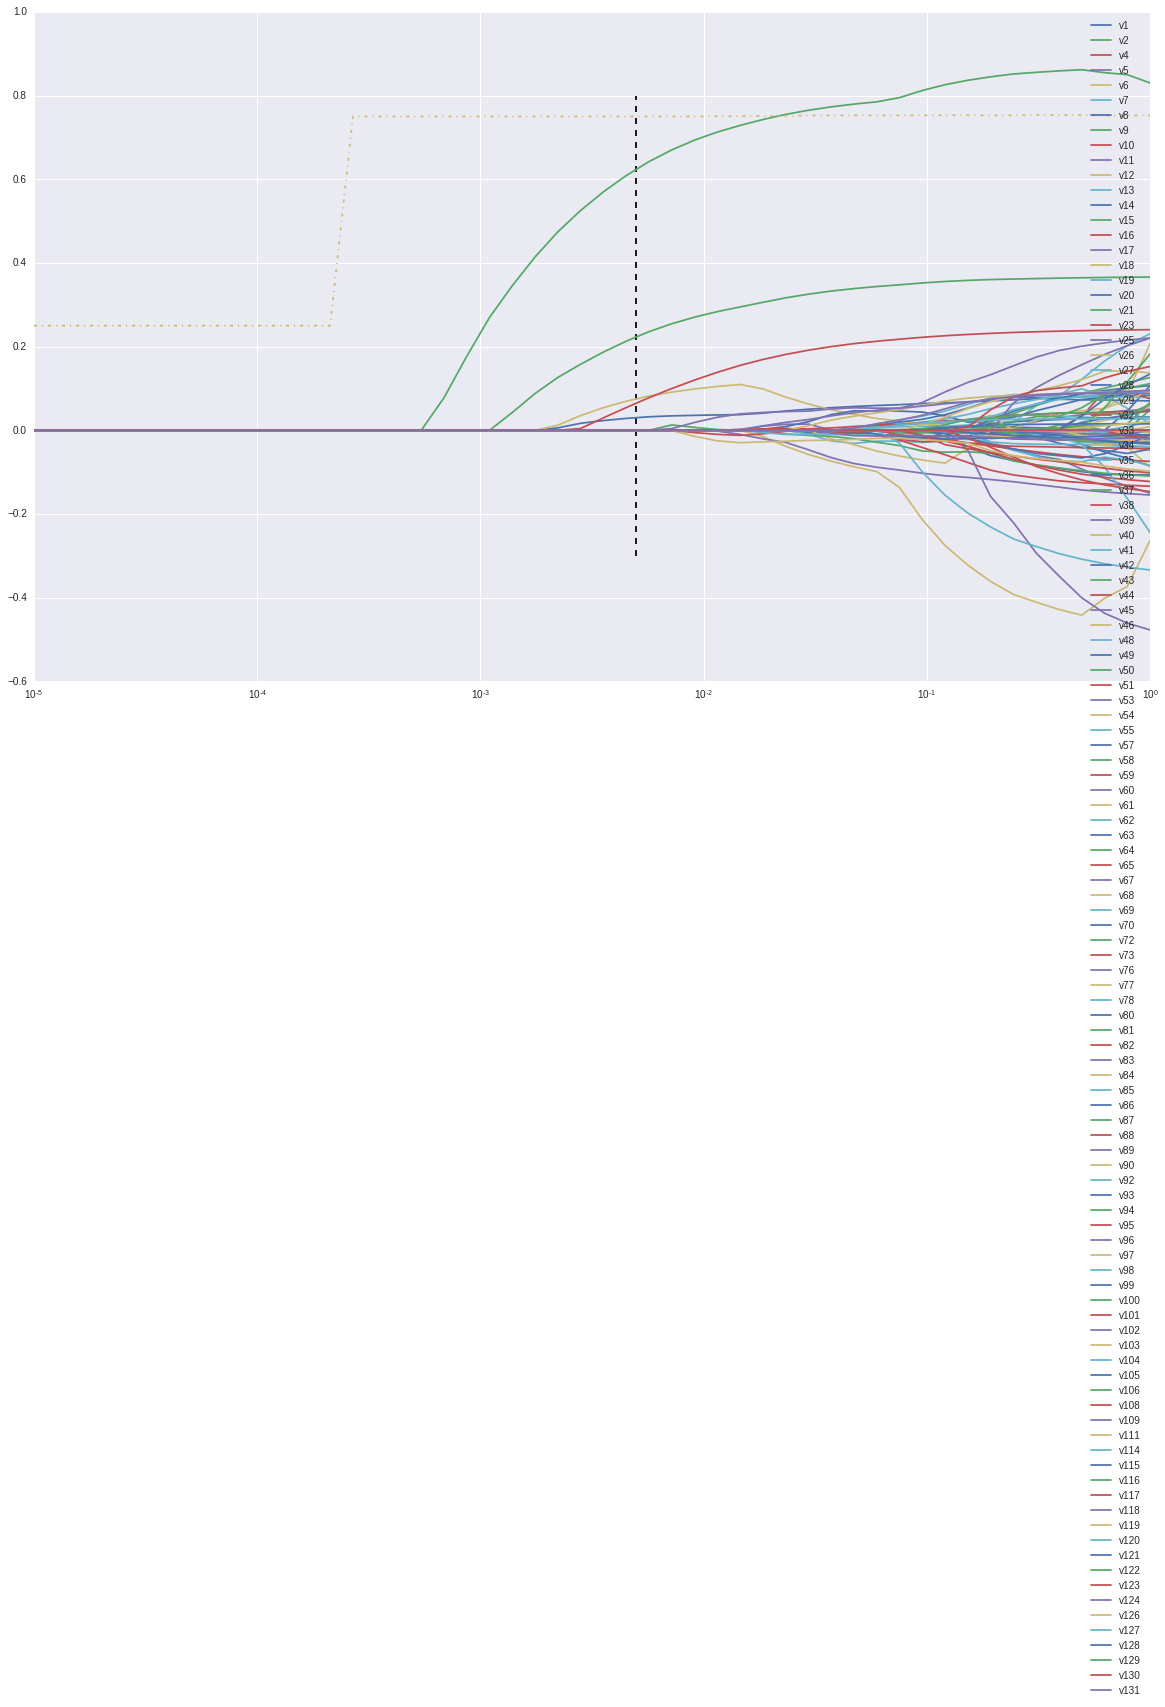

In [40]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
for i in range(coeff.shape[1]):
    ax.plot(C_list, coeff[:,i], label=X.columns[i])
    
ax.plot(C_list, score, linestyle='-.' )    
ax.legend()
ax.set_xscale('log')
ax.vlines(0.005, -0.3, 0.8, linestyle = '--')

In [21]:
np.logspace(-5,0,50)[30]

0.011513953993264481

In [22]:
coeff[30]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.03344075,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.11309968,  0.        ,
        0.        ,  0.        ,  0.17537541,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.01601537,
        0.        ,  0.        ,  0.        ,  0.72305613,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00102779,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [23]:
X.columns[(coeff[30]!=0)]

Index([u'v14', u'v34', u'v38', u'v45', u'v50', u'v62', u'v88', u'v109',
       u'v119', u'v129'],
      dtype='object')

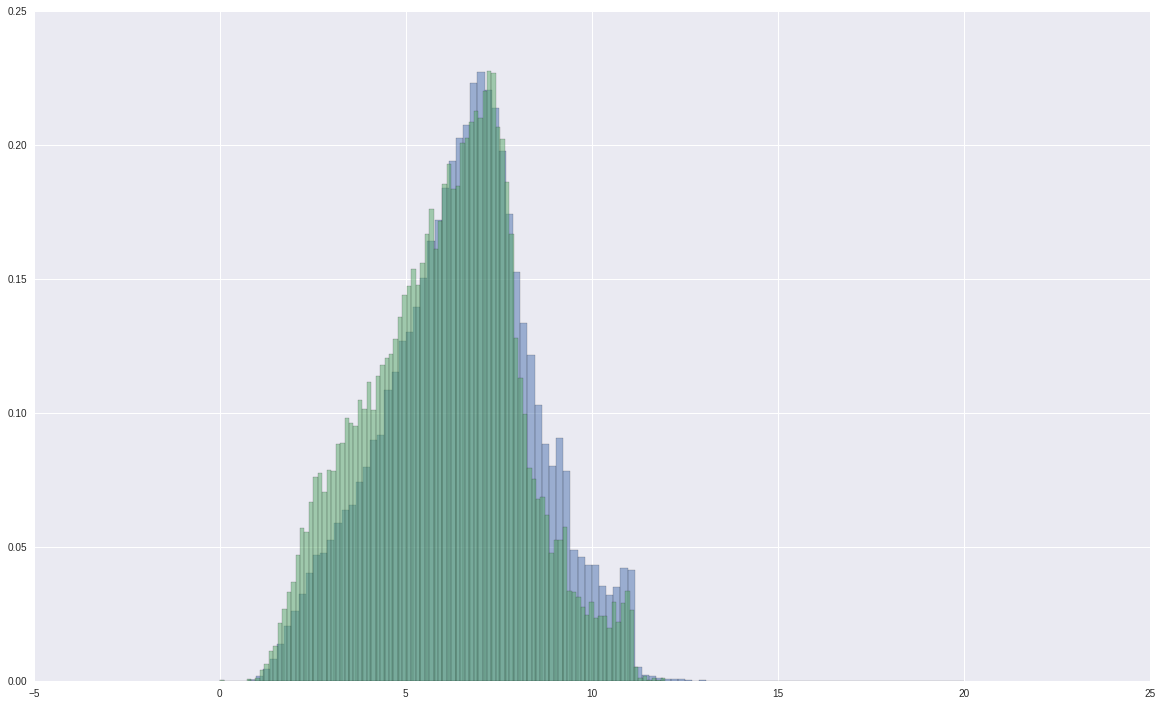

In [30]:
fig=plt.figure(figsize=(20,12))
df[df['target']==1]['v34'].hist(bins=100, label='approved', normed=True, alpha=0.5)
df[df['target']==0]['v34'].hist(bins=100, label='rejected', normed=True, alpha=0.5)
ax.legend()

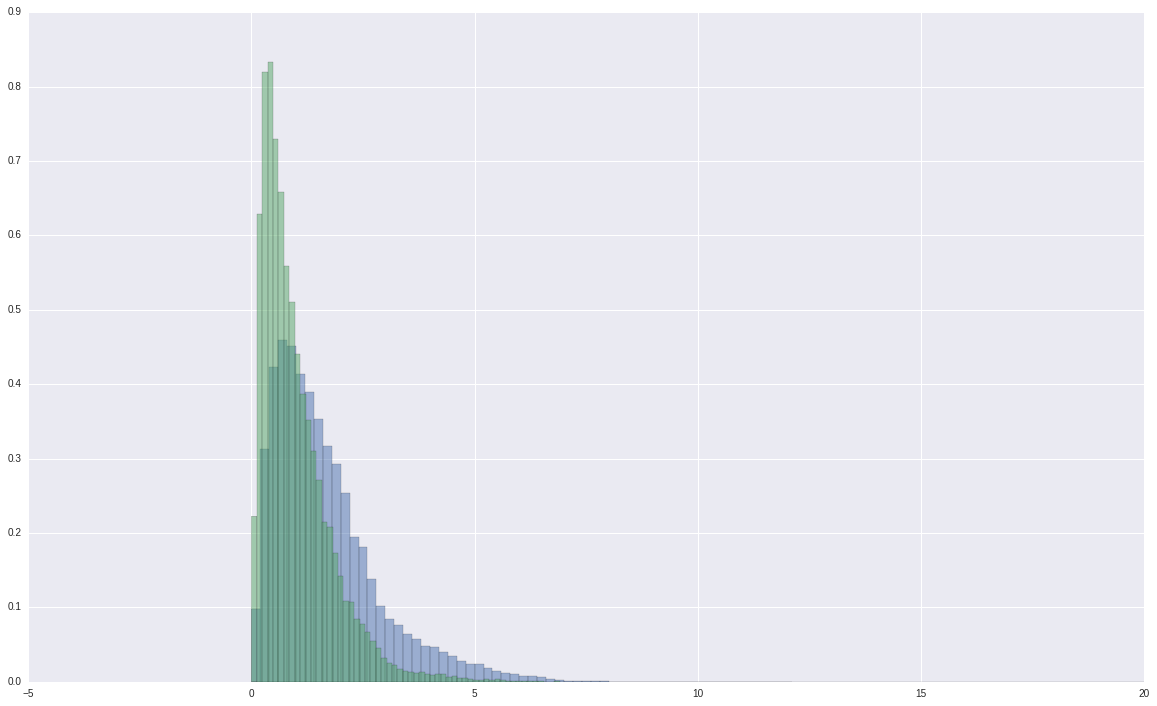

In [31]:
fig=plt.figure(figsize=(20,12))
df[df['target']==1]['v50'].hist(bins=100, label='approved', normed=True, alpha=0.5)
df[df['target']==0]['v50'].hist(bins=100, label='rejected', normed=True, alpha=0.5)
ax.legend()

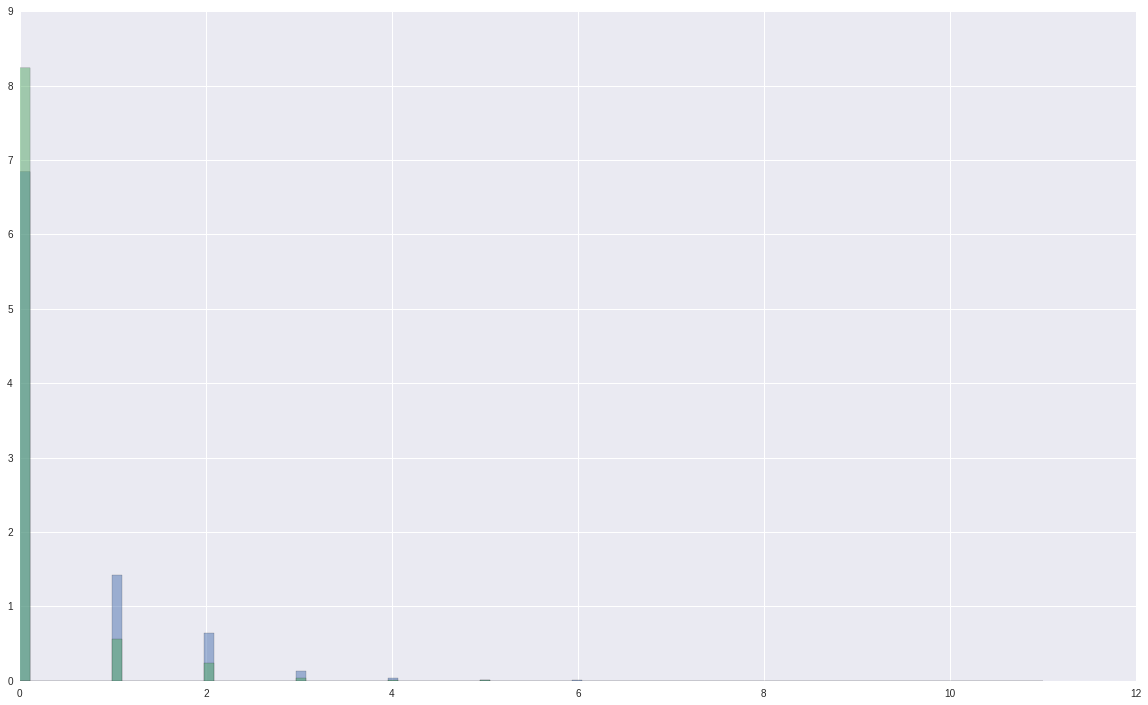

In [73]:
fig=plt.figure(figsize=(20,12))
df[df['target']==1]['v129'].hist(bins=100, label='approved', normed=True, alpha=0.5)
df[df['target']==0]['v129'].hist(bins=100, label='rejected', normed=True, alpha=0.5)
ax.legend()

In [41]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


# Load Test File

In [22]:
test_zip = zipfile.ZipFile('test.csv.zip')
df_test = pd.read_csv(test_zip.open('test.csv'))

In [23]:
df_test_clean = data_clean(df_test)
predict_test = model.predict_proba(df_test_clean.drop('ID',axis=1))

In [60]:
output_df= pd.DataFrame(df_test_clean['ID'],columns=['ID',"PredictedProb"])

In [69]:
output_df['PredictedProb'] = predict_test[:,1]

In [70]:
output_df.to_csv('submission.csv',index=False)

In [17]:
X_RF = X_T[[u'v14', u'v34', u'v38', u'v45', u'v50', u'v62', u'v88', u'v109',
       u'v119', u'v129']]

In [28]:
RF = RandomForestClassifier(50)
RF.fit(X_T, y_T)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
predict_RF = RF.predict_proba(df_test_clean.drop('ID',axis=1))

In [30]:
output_df= pd.DataFrame(df_test_clean['ID'],columns=['ID',"PredictedProb"])
output_df['PredictedProb'] = predict_RF[:,1]
output_df.to_csv('submission.csv',index=False)